# Name: Jaswanthi Nannuru
## 250 Top rated movies acccording to IMDb

## Question:
### Analyzing the top rating movies and determining the increase in movies from 20th century according to IMDb


### All the top rated movies are retrieved by web scraping an IMDb website

In [26]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

# Download IMDB's Top 250 data
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

#form to store all the films data
films = soup.select('td.titleColumn')
film_links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
film_crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
film_ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]
film_votes = [b.attrs.get('data-value') for b in soup.select('td.ratingColumn strong')]

imdb = []

# Store each item into dictionary (data), then put those into a list (imdb)
for index in range(0, len(films)):
    
# Seperate movie into: 'place', 'title', 'year'
    movie_string = films[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    released_year = re.search('\((.*?)\)', movie_string).group(1)
    rated_position = movie[:len(str(index))-(len(movie))]
    
#all the data of each particular movie
    movie_data = {"movie_title": movie_title,
            "year": released_year,
            "position": rated_position,
            "star_cast": film_crew[index],
            "rating": film_ratings[index]}
           # "vote": film_votes[index],
           # "link": film_links[index]}
            
#getting all the data at a place
    imdb.append(movie_data)
    
    
list1=[]
for item in imdb:
   # list1.append(item['movie_title'])

# printing all the details of all top rated movies
    #print(item['position'], '-', item['movie_title'], '('+item['year']+') -', 'Starring:', item['star_cast'])
    list1.append(item['year'])
    
#sorting all the list of movies from
list2=[]
list2= sorted(list1)
#print(list2)
#year1=1921
yearCount =0
movieCount =0
# counting te number of movies for every 20 years
print("the count of movies for every 20 years")
j =1
for i in range(len(list2)):
    
    if(i != (len(list2))-1):
        if(yearCount <  20):
            yearCount = (int(list2[i+1])- int(list2[i])) +yearCount
            movieCount = movieCount+1
        else:

            if(j<=5):
                
                print(j,end ='--')
                print(yearCount,'years--', movieCount)
                print()
                i=i+1 
                yearCount =1
                movieCount =1
                j=j+1
    else:
        movieCount = movieCount+1
        #print(yearCount, movieCount)
        

the count of movies for every 20 years
1--20 years-- 17

2--20 years-- 31

3--20 years-- 33

4--20 years-- 69

5--20 years-- 91



### Pickling the data

In [14]:

html = requests.get(url)
results = html.text 
 

import pickle
# pickling data
with open('data.pkl', 'wb') as f:
    pickle.dump(results, f)

# loading data from a pickle file
with open('data.pkl', 'rb') as f:
    new_results = pickle.load(f)
    #print(type(new_results)) 
soup = BeautifulSoup(new_results)
# printing the results in soup
#print(soup) 

### Sorting all the retrieved data

In [27]:
list2=[]
list2= sorted(list1)

list3 = [[l, list2.count(l)] for l in set(list2)]
#list3.sort(reverse = True)
list3.sort()

#printing the sorted list of count of all top rated movies from 1921 to 2019
#print(list3)


### Importing all the  analysed data into pandas

In [16]:
import pandas as pd
from collections import OrderedDict
from datetime import date


my_dict = {'1921 - 1940': 17, '1941 - 1960': 31, '1961 - 1980': 33, '1981 - 2000': 69, '2001 - 2019': 91}
#print(my_dict)

'''
from prettytable import PrettyTable

table = PrettyTable()

table.title = 'No. of movies in each era'
table.field_names = ['years', 'count']
table.add_row(['1921 - 1940', 17])
table.add_row(['1941 - 1960', 31])
table.add_row(['1961 - 1980', 33])
table.add_row(['1981 - 2000', 69])
table.add_row(['2001 - 2019', 91])

print(table)

'''
mainList= []
#my_dict={}
for key in sorted(my_dict.keys()):
    f=[]
    d = key    
    f.append(d)
    p = my_dict[key]
    f.append(p)
    mainList.append(f)
#print(mainList)

import pandas as pd
#Creating a dataframe object from listoftuples
df = pd.DataFrame(mainList, columns = ['years', 'count'])
#pd.title = 'No. of movies in each era'

from IPython.display import display
df   



,years,count
0,1921 - 1940,17
1,1941 - 1960,31
2,1961 - 1980,33
3,1981 - 2000,69
4,2001 - 2019,91


### Using matplotlib all the results are visualized in the line graph, showing how the top rated movies are increasing from past century

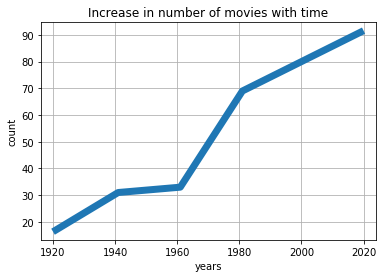

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style
%matplotlib inline
from pylab import *

x = [1921,1941,1961,1981,2019]
y = [17,31,33,69,91]

plt.plot(x, y, linewidth=7.0, )
plt.xlabel('years')
plt.ylabel('count')
plt.title('Increase in number of movies with time')
grid(True)
plt.show()



## Conclusion:
### From my project done in python, I would like to conclude and show the increase of top rated movies in my line graph from 1921 to till date according to the data registered by the IMDb. After scraping all the data from the IMDb website, I found that the increase in top rated movies has changed to a greater extent. And it is observed that from 1960, there is an enormous change in increase of top rated movies.